Linear Regression Model From Scratch
(No Sklearn)

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import random 

Main Ideas we need to cover:
1) Use least-squares to fit a line to the data
2) Calculate R^2
3) Calculate a p-value for R^2

In [41]:
stock = 'AAPL'
data = yf.download(stock, start='2020-01-01', end='2025-01-01')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716064  72.776591  71.466805  71.721011  135480400
2020-01-03  72.009125  72.771752  71.783969  71.941336  146322800
2020-01-06  72.582909  72.621646  70.876075  71.127866  118387200
2020-01-07  72.241547  72.849224  72.021231  72.592594  108872000
2020-01-08  73.403633  73.706264  71.943744  71.943744  132079200


In [42]:
data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in data.columns]
print("Simplified Columns:", data.columns)

Simplified Columns: Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL'], dtype='object')


In [43]:
data['Returns_AAPL'] = data['Close_AAPL'].pct_change()
data.dropna(inplace=True)
print(data)

            Close_AAPL   High_AAPL    Low_AAPL   Open_AAPL  Volume_AAPL  \
Date                                                                      
2020-01-03   72.009125   72.771752   71.783969   71.941336    146322800   
2020-01-06   72.582909   72.621646   70.876075   71.127866    118387200   
2020-01-07   72.241547   72.849224   72.021231   72.592594    108872000   
2020-01-08   73.403633   73.706264   71.943744   71.943744    132079200   
2020-01-09   74.962791   75.156472   74.132375   74.384158    170108400   
...                ...         ...         ...         ...          ...   
2024-12-24  257.916443  257.926411  255.009620  255.209412     23234700   
2024-12-26  258.735504  259.814335  257.347047  257.906429     27237100   
2024-12-27  255.309296  258.415896  252.782075  257.546826     42355300   
2024-12-30  251.923019  253.221595  250.474615  251.952985     35557500   
2024-12-31  250.144974  253.001833  249.156056  252.162760     39480700   

            Returns_AAPL

In [44]:
X= data[['Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Volume_AAPL']]
y = data['Close_AAPL']
print(X)
print(y)

             Open_AAPL   High_AAPL    Low_AAPL  Volume_AAPL
Date                                                       
2020-01-03   71.941336   72.771752   71.783969    146322800
2020-01-06   71.127866   72.621646   70.876075    118387200
2020-01-07   72.592594   72.849224   72.021231    108872000
2020-01-08   71.943744   73.706264   71.943744    132079200
2020-01-09   74.384158   75.156472   74.132375    170108400
...                ...         ...         ...          ...
2024-12-24  255.209412  257.926411  255.009620     23234700
2024-12-26  257.906429  259.814335  257.347047     27237100
2024-12-27  257.546826  258.415896  252.782075     42355300
2024-12-30  251.952985  253.221595  250.474615     35557500
2024-12-31  252.162760  253.001833  249.156056     39480700

[1257 rows x 4 columns]
Date
2020-01-03     72.009125
2020-01-06     72.582909
2020-01-07     72.241547
2020-01-08     73.403633
2020-01-09     74.962791
                 ...    
2024-12-24    257.916443
2024-12-26    2

In [45]:
X = np.array(X)
indices = np.random.permutation(len(X))

In [46]:
train_ratio = 0.8
split_index = int(len(X)*train_ratio)

In [47]:
x_train = X[indices[:split_index]]
x_test = X[indices[split_index:]]
y_train = np.array(y)[indices[:split_index]]
y_test = np.array(y)[indices[split_index:]]

print("x:train:", x_train)
print("x_test:", x_test)
print("y_train:", y_train)
print("y-test:", y_test)

x:train: [[1.27406065e+02 1.27865839e+02 1.25997396e+02 8.76688000e+07]
 [1.63352629e+02 1.63946645e+02 1.62253711e+02 4.19496000e+07]
 [1.86910066e+02 1.88597694e+02 1.86244943e+02 4.52800000e+07]
 ...
 [1.86728906e+02 1.88369053e+02 1.86659316e+02 5.37905000e+07]
 [1.48591484e+02 1.48838988e+02 1.45769948e+02 4.83942000e+07]
 [2.18529026e+02 2.21402706e+02 2.18529026e+02 4.41553000e+07]]
x_test: [[1.64742120e+02 1.66473933e+02 1.63995644e+02 4.81164000e+07]
 [1.52012560e+02 1.52556241e+02 1.48691177e+02 5.60071000e+07]
 [1.65757322e+02 1.68504360e+02 1.65428886e+02 4.82518000e+07]
 ...
 [1.67112192e+02 1.67820698e+02 1.63540069e+02 8.27727000e+07]
 [1.37303210e+02 1.38517056e+02 1.36345945e+02 7.04337000e+07]
 [1.66216705e+02 1.68794924e+02 1.63264541e+02 8.72278000e+07]]
y_train: [127.04410553 163.67933655 188.31973267 ... 186.88793945 147.90837097
 220.78407288]
y-test: [165.06060791 149.13600159 168.22567749 112.66291046 167.01780701
 130.29190063 138.32489014 142.76948547 171.470

PCA (Principal Component Analysis)
1: Standardize.
2: Covariance Matrix.
3. Eigen Decomp.
4. Sort Eigenvalues.
5. transform.

In [59]:
mean = np.mean(x_test, axis=0)
std = np.std(x_test, axis=0)
x_test_standard = (x_test - mean) / std
x_train_standard = (x_train - mean) / std
print(x_test_standard)

[[ 0.36012232  0.36094038  0.37958968 -0.77123938]
 [ 0.06512977  0.04036047  0.02388002 -0.62889558]
 [ 0.38364843  0.40770922  0.41290138 -0.76879684]
 ...
 [ 0.41504596  0.39196175  0.36900109 -0.14605919]
 [-0.27574206 -0.28301793 -0.26305044 -0.36864782]
 [ 0.3942941   0.41440206  0.36259721 -0.06569169]]


What this is doing is we're using z-score formula which is 
z = (x-(mean))/std. 

In [60]:
cov_matrix = np.cov(x_test_standard, rowvar=False)
print(cov_matrix)

[[ 1.00398406  1.00344253  1.00348082 -0.65582341]
 [ 1.00344253  1.00398406  1.00334835 -0.64662013]
 [ 1.00348082  1.00334835  1.00398406 -0.66271199]
 [-0.65582341 -0.64662013 -0.66271199  1.00398406]]


We now make a covariance matrix which tells us the magnitude/direction of these standardized values.

Facts about covariance matrixes:
they're nxn symmetric
the diagonal entries are all equal
upper and lower triangular portions are also equal
mainly looking at the sign of the numbers

Negative: One increases / other decreasing (inversely correlated)
Positive: Both increase / decreases (correlated)

In [61]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Now we're using lin-alg to find the eigenvalues/ eigenvectors which they're "n" sets for the amount of dim the matrix has. 

We're basically finding out how much varience on the data by calculating the eigen stuff.

In [62]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print(sorted_eigenvalues)

[3.52205556e+00 4.92986416e-01 4.83332935e-04 4.10950211e-04]


We then sorted it in increasing order.

In [63]:
m = 2
top_eigenvectors = sorted_eigenvectors[:, :m]
x_test_reduced = np.dot(x_test_standard, top_eigenvectors)
x_train_reduced = np.dot(x_train_standard, top_eigenvectors)

We then reduced to a 1 dimensional array and then we took the dotproduct of the two vectors which results us with new data on a new plane.

In [69]:
X = np.hstack([np.ones((x_train_reduced.shape[0], 1)),x_train_reduced])
w = np.linalg.inv(X.T @ X) @ X.T @ y_train

bias = w[0]
coeff = w[1:]
print("Bias:", bias)
print("Coeff:", coeff)

Bias: 149.35281310605563
Coeff: [ 22.76893593 -10.17086842]


In [74]:
y_pred = np.dot(x_test_reduced, w[1:]) + w[0]
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.058386458017351


In [75]:
y_mean = np.mean(y_test)

ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - y_mean) ** 2)

r_squared = 1 - (ss_res / ss_tot)

print("R^2 Score:", r_squared)


R^2 Score: 0.9988960378108052


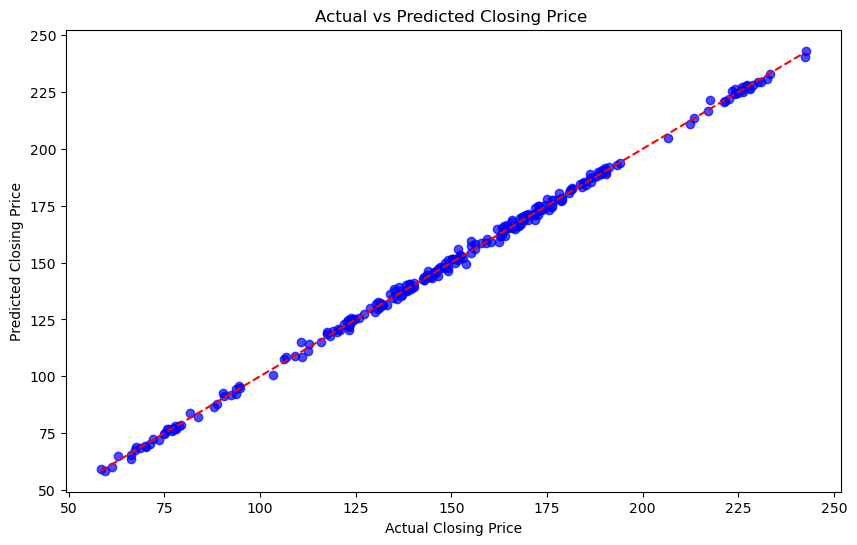

In [76]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red',linestyle='--')

plt.xlabel('Actual Closing Price')
plt.ylabel('Predicted Closing Price')
plt.title('Actual vs Predicted Closing Price ')
plt.show()